# **MAKİNE ÖĞRENMESİ**  


In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/Advertising.csv") #Reklam harcamaları neticesinde satış istatistikleri.

In [ ]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df = df.iloc[: ,1: len(df)] #Index problemini çözdük.

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## 1.DOĞRUSAL REGRESYON

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

### 1.1 BASİT DOĞRUSAL REGRESYON
- Bir tane bağımsız değişkenden oluşan modellerdir.


#### 1.1.1 Model Oluşturma

In [ ]:
#TV-SALES arasındaki doğrusal regresyon ilişkisine bakacağız.

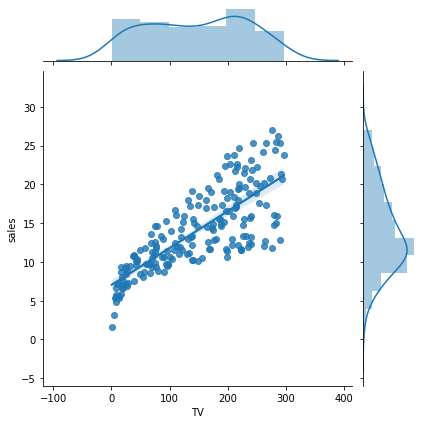

In [ ]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

In [ ]:
x = df[["TV"]]
y = df[["sales"]]

In [ ]:
reg = LinearRegression()

In [ ]:
model = reg.fit(x, y)

In [ ]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
str(model)

'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)'

In [ ]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [ ]:
model.intercept_ #beta0 katsayısı(sabit)

array([7.03259355])

In [ ]:
model.coef_ #beta1 katsayısı

array([[0.04753664]])

In [ ]:
model.score(x, y) #modelin skoru(rkare): Bağımlı değişkendeki değişikliğin, bağımsız değişkenlerce açıklanma yüzdesidir.

0.611875050850071

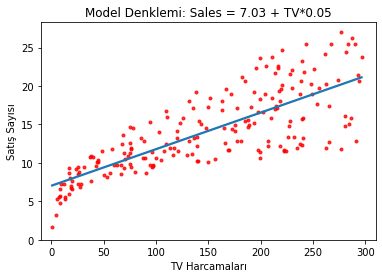

In [ ]:
#Model görselleştirmesi
g = sns.regplot(df["TV"], df["sales"], ci = None, scatter_kws = {"color": "r", "s":9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom = 0);

#### 1.1.2 Tahmin Etme İşlemi 


In [ ]:
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [ ]:
model.predict([[165]])

array([[14.87613922]])

In [ ]:
yeni_veri = [[5], [15], [30]]
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

#### 1.1.3 Model Doğrulama


Amaç gerçek değerle tahmin edilen değer arasındaki farkı minimum yapmak.
*   MSE: Hata Kareler Ortalaması
*   RMSE: Hata Kareler Ortalamasının Karekökü

In [ ]:
gercek = y.head(10) #Gerçek değerler

In [ ]:
tahmin = pd.DataFrame(model.predict(x)[0:10]) #Tahmin edilen değerler

In [ ]:
hatalar = pd.concat([gercek, tahmin], axis = 1)

In [ ]:
hatalar.columns = ["gercek", "tahmin"]

In [ ]:
hatalar

,gercek,tahmin
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [ ]:
hatalar["hata"] = hatalar["gercek"] - hatalar["tahmin"]

In [ ]:
hatalar

,gercek,tahmin,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [ ]:
hatalar["hataların karesi"] = hatalar["hata"] * hatalar["hata"]

In [ ]:
hatalar

,gercek,tahmin,hata,hataların karesi
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [ ]:
np.mean(hatalar["hataların karesi"])

9.290350329638102

### 1.2 ÇOKLU DOĞRUSAL REGRESYON
- Temel amaç, bağımlı ve bağımsız değişkenler arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.
- Katsayılar(beta1, beta2...) model içindeki bağımsız değişkenleri kontrol etmek için kullanılıyor.


#### 1.2.1 Model Oluşturma

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
x = df.drop("sales", axis = 1)
y = df[["sales"]]

In [ ]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [ ]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
#States Model ile Model Kurmak: Daha fazla bilgi alacağız.

In [ ]:
lm = sm.OLS(y, x)

In [ ]:
model = lm.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):                   2.43e-171
Time:                        14:34:33   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Scikit Learn ile Model Kurmak

In [ ]:
lm = LinearRegression()

In [ ]:
model = lm.fit(x, y)

In [ ]:
model.intercept_

array([2.93888937])

In [ ]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

#### 1.2.2 Tahmin Etme İşlemi
Sales = 2.94 + 0.04xTV + 0.19xradio - 0.001xnewspaper

In [ ]:
#30 birim TV, 10 birim radio, 40 birim newspaper
2.94 + 0.04*30 + 0.19*10 - 0.001*40

5.999999999999999

In [ ]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri.columns = ["TV", "radio", "newspaper"]
yeni_veri

,TV,radio,newspaper
0,30,10,40


In [ ]:
model.predict(yeni_veri)

array([[6.15562918]])

In [ ]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [ ]:
model.predict(x)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [ ]:
MSE = mean_squared_error(y, model.predict(x))
MSE

2.784126314510936

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

#### 1.2.3 Model Doğrulama

In [ ]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [ ]:
#Sınama seti ile hata hesaplama
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 99)

In [ ]:
x_train.head()

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


In [ ]:
y_train.head()

,sales
16,12.5
51,10.7
97,15.5
164,11.9
71,12.4


In [ ]:
x_test.head()

,TV,radio,newspaper
135,48.3,47.0,8.5
127,80.2,0.0,9.2
191,75.5,10.8,6.0
66,31.5,24.6,2.2
119,19.4,16.0,22.3


In [ ]:
y_test.head()

,sales
135,11.6
127,8.8
191,9.9
66,9.5
119,6.6


In [ ]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)

In [ ]:
#Eğitim Hatası
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))

1.723682482265075

In [ ]:
#Test Hatası
np.sqrt(mean_squared_error(y_test, model.predict(x_test)))

1.4312783138301646

In [ ]:
#K-katlı cv ile hata hesaplama: Daha doğru değerlendirme
cross_val_score(model, x_train, y_train, cv = 10, scoring = "neg_mean_squared_error")

array([-2.1019073 , -2.48953197, -3.09704214, -2.34694216, -3.68175761,
       -1.8691401 , -3.18173007, -4.1927349 , -2.17128376, -8.03821974])

In [ ]:
MSE = np.mean(-cross_val_score(model, x_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))
MSE

3.3170289742341255

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

1.8212712522395245

### 1.3 RIDGE REGRESYON
- Çok fazla parametre olduğunda klasik regresyona göre daha iyidir.
- Aşırı öğrenmeye karşı dirençlidir.
- Yanlıdır fakat varyansı düşüktür.
- Lambda için iyi bir değer bulunması önemlidir.

#### 1.3.1 Model Oluşturma



In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) #Kategorik değişkenlere one hot encoding yaklaşımı yaptık.
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64") #Label ve dummi sonrası değişkenlerin kendisini atıyoruz.
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [ ]:
df.shape

(263, 20)

In [ ]:
ridge_model = Ridge(alpha = 0.1).fit(x_train, y_train) #Alphaya bağlı katsayılar değişir.
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [ ]:
ridge_model.intercept_

-4.578626905722899

In [ ]:
lambdalar = 10**np.linspace(10, -2, 100)*0.5 #Rastgele sayılar ürettik.

In [ ]:
ridge_model = Ridge()
katsayılar = []

for i in lambdalar: 
  ridge_model.set_params(alpha = i)
  ridge_model.fit(x_train, y_train)
  katsayılar.append(ridge_model.coef_)

In [ ]:
katsayılar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

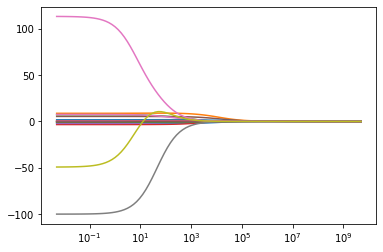

In [ ]:
ax = plt.gca()
ax.plot(lambdalar, katsayılar)
ax.set_xscale("log")

#### 1.3.2 Tahmin Etme İşlemi

In [ ]:
ridge_model = Ridge().fit(x_train, y_train)

In [ ]:
y_pred = ridge_model.predict(x_train)

In [ ]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [ ]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [ ]:
#Eğitim hatası
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

289.34470696006565

In [ ]:
np.sqrt(np.mean(-cross_val_score(ridge_model, x_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

351.39315856063195

In [ ]:
#Test Hatası
y_pred = ridge_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

356.8082905730239

#### 1.3.3 Model Doğrulama

In [ ]:
ridge_model = Ridge().fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.8082905730239

In [ ]:
lambdalar1 = np.random.randint(0, 1000, 100)

In [ ]:
lambdalar2 = 10**np.linspace(10, -2, 100)*0.5

In [ ]:
ridgecv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([ 68, 227, 407, 648, 914, 534, 304, 920, 161,  43, 871, 432, 293,
       170, 467, 869, 974, 715, 199, 689,  59, 551, 156, 342, 914, 801,
       342, 911,  87, 410, 176,  77, 688, 924, 113, 380, 742, 685, 770,
       552, 127, 556, 295, 443, 269, 587, 482, 563, 433, 322, 675, 687,
       847, 867, 853, 975, 675, 717, 838, 489, 629, 841, 827, 277,  88,
       269, 128, 175, 247, 442,  11, 806, 542, 497, 862, 880, 877, 590,
       652, 341,  76, 535, 685, 736, 613, 487, 526, 180, 932,  80, 914,
       592, 421, 979, 666, 903, 146, 497, 178, 763]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [ ]:
a = ridgecv.alpha_ #Optimum parametre

In [ ]:
ridgecv = RidgeCV(alphas = lambdalar2, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [ ]:
ridgecv.alpha_ #Optimum parametre

0.7599555414764666

In [ ]:
#Final modeli
ridge_tuned = Ridge(alpha = a).fit(x_train, y_train)

In [ ]:
y_pred = ridge_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.3086302569961

### 1.4 LASSO REGRESYON
- Amaç: MSE minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.
- Ridge regresyonunun ilgili-ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için önerilmiştir.
- Lassoda katsayılar sıfıra yaklaştırılır.
- Ridge - Lasso yöntemleri birbirlerinden üstün değildir

#### 1.4.1 Model Oluşturma

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV

In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) #Kategorik değişkenlere one hot encoding yaklaşımı yaptık.
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64") #Label ve dummi sonrası değişkenlerin kendisini atıyoruz.
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [ ]:
df.shape

(263, 20)

In [ ]:
lasso_model = Lasso().fit(x_train, y_train)

In [ ]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_model.intercept_ #sabit

-5.587450677335255

In [ ]:
lasso_model.coef_ #katsayılar

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [ ]:
#Farklı lambda değerlerine karşılık katsayılar
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10, -2, 100)*0.5 

for a in alphas:
  lasso.set_params(alpha = a)
  lasso.fit(x_train, y_train)
  coefs.append(lasso.coef_)

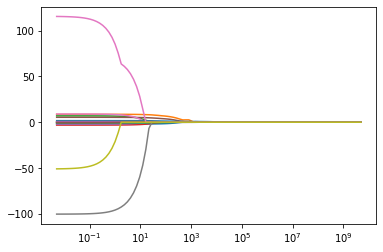

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

#### 1.4.2 Tahmin Etme İşlemi

In [ ]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_model.predict(x_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [ ]:
lasso_model.predict(x_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [ ]:
y_pred = lasso_model.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.09758845540324

In [ ]:
r2_score(y_test, y_pred) #Modelin açıklanabilirliğini ifade eder.

0.414227981323662

#### 1.4.3 Model Doğrulama

In [ ]:
lasso_cv_model = LassoCV(alphas = lambdalar1, cv = 10, max_iter = 100000).fit(x_train, y_train)

In [ ]:
lasso_cv_model.alpha_

180

In [ ]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(x_train, y_train)

In [ ]:
y_pred = lasso_tuned.predict(x_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

362.818674181442

In [ ]:
pd.Series(lasso_tuned.coef_, index = x_train.columns) #Doğrulanmış modelin katsayıları. 0 olanlar maaşa etkisiz olan faktörler.

AtBat         -1.162399
Hits           5.622638
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.853245
Years          0.000000
CAtBat        -0.168377
CHits          0.220070
CHmRun        -0.000000
CRuns          1.074456
CRBI           0.474044
CWalks        -0.222949
PutOuts        0.273166
Assists        0.179978
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

### 1.5 ELASTIC NET REGRESYON
- Amaç: Hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.
- ElasticNet L1 ve L2 yaklaşımlarını birleştirir.

#### 1.5.1 Model Oluşturma

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn import model_selection
from sklearn.linear_model import ElasticNetCV

In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) #Kategorik değişkenlere one hot encoding yaklaşımı yaptık.
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64") #Label ve dummi sonrası değişkenlerin kendisini atıyoruz.
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
enet_model = ElasticNet().fit(x_train, y_train)

In [ ]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [ ]:
enet_model.intercept_

-6.465955602112217

#### 1.5.2 Tahmin Etme İşlemi

In [ ]:
enet_model.predict(x_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [ ]:
enet_model.predict(x_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [ ]:
y_pred = enet_model.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181244

In [ ]:
r2_score(y_test, y_pred)

0.41070222469326934

#### 1.5.3 Model Doğrulama

In [ ]:
alphas = 10**np.linspace(10, -2, 100)*0.5

In [ ]:
enet_cv_model = ElasticNetCV(alphas = alphas, cv = 10).fit(x_train, y_train)

In [ ]:
enet_cv_model.alpha_ #Optimum parametresi(lambda)

5748.784976988678

In [ ]:
enet_cv_model.intercept_ #Sabit

-31.463121225640975

In [ ]:
enet_cv_model.coef_

array([ 0.61111381,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.11212622,  0.        ,
        0.25252702,  0.18656722,  0.00444355,  0.30988823,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [ ]:
#Final Modeli
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(x_train, y_train)

In [ ]:
print(dir(enet_tuned))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_preprocess_data', '_set_intercept', 'alpha', 'coef_', 'copy_X', 'dual_gap_', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'l1_ratio', 'max_iter', 'n_iter_', 'normalize', 'path', 'positive', 'precompute', 'predict', 'random_state', 'score', 'selection', 'set_params', 'sparse_coef_', 'tol', 'warm_start']


In [ ]:
y_pred = enet_tuned.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

393.97530658505536

In [ ]:
?ElasticNet

## 2.DOĞRUSAL OLMAYAN REGRESYON

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import xgboost 
import lightgbm
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
!pip install catboost

     |████████████████████████████████| 64.8MB 58kB/s 


### 2.1 K En Yakın Komşu
- Gözlemlerin birbirine olan benzerlikleri üzerinden tahmin yapılır.
-Sınıflandırma ya da regresyon için kullanılabilen bir algoritmadır.
- Büyük veri setlerinde başarılı değildir.
- Parametrik değildir.


#### 2.1.1 Model Oluşturma ve Tahmin

In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) #Kategorik değişkenlere one hot encoding yaklaşımı yaptık.
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64") #Label ve dummi sonrası değişkenlerin kendisini atıyoruz.
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
knn_model = KNeighborsRegressor().fit(x_train, y_train)

In [ ]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knn_model.n_neighbors #Komşu sayısı

5

In [ ]:
knn_model.metric

'minkowski'

In [ ]:
dir(knn_model) #Model nesnesinin içinden ne alabiliriz.

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'p',
 'predict',
 'radius',
 'score',
 'set_params',
 'weights']

In [ ]:
y_pred = knn_model.predict(x_test)
y_pred

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ,  325.5   ,
        216.5   ,  101.5   ,  982.    ,  886.6666,  590.    ,  901.6666,
        831.6666,  157.5   ,  393.    , 1005.    ,  735.5   ,   97.    ,
        884.4   ,  302.    ,  450.    ,  817.6666,  832.6666,  392.3334,
        528.    ,   81.6   ,  735.    ,  470.    ,  722.5   ,  101.    ,
         90.5   ,   74.6   ,  748.3334,  217.    ,  280.5334, 1044.5   ,
        955.    ,  232.    ,   78.6   ,  529.    ,   77.6   ,  106.5   ,
        516.6666,  593.6666, 1005.    ,  649.1666,  715.    ,  101.5   ,
        134.5   ,  810.    ,  743.    ,  521.3334,  664.3334,  195.    ,
        102.4   ,  728.5   ,  488.    ,  962.5   ,  230.8334, 1040.    ,
        885.    ,  542.    ,  720.4   ,  571.    ,  735.    ,   81.6   ])

In [ ]:
y_test

148    850.0
154    277.5
318    875.0
279    150.0
88     260.0
       ...  
122    400.0
282     90.0
111    385.0
232    450.0
51      70.0
Name: Salary, Length: 66, dtype: float64

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

426.6570764525201

#### 2.1.2 Model Doğrulama

In [ ]:
knn_model #Modelin hiperparametresi n_neighbors

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
RMSE = []

for k in range(10):
  k = k+1
  knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
  y_pred = knn_model.predict(x_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  RMSE.append(rmse)
  print("k=", k, "için RMSE değeri:", rmse)

k= 1 için RMSE değeri: 455.03925390751965
k= 2 için RMSE değeri: 415.99629571490965
k= 3 için RMSE değeri: 420.6765370082348
k= 4 için RMSE değeri: 428.8564674588792
k= 5 için RMSE değeri: 426.6570764525201
k= 6 için RMSE değeri: 423.5071669008732
k= 7 için RMSE değeri: 414.9361222421057
k= 8 için RMSE değeri: 413.7094731463598
k= 9 için RMSE değeri: 417.84419990871265
k= 10 için RMSE değeri: 421.6252180741266


In [ ]:
#GridSearchCV Metodu
knn_params = {"n_neighbors": np.arange(1, 30, 1)}
knn = KNeighborsRegressor()

In [ ]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(x_train, y_train)

In [ ]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [ ]:
#Final Modeli
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(x_train, y_train)
y_pred = knn_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

413.7094731463598

### 2.2 Destek Vektör Regresyonu
- Sınıflandırma ve regresyon için kullanılabilen güçlü bir tekniktir.
- Amaç: Bir marjin aralığına maksimum noktayı en küçük hata ile alabilecek şekilde doğru ya da eğriyi belirlemektir.

#### 2.2.1 Model Oluşturma ve Tahmin

In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) #Kategorik değişkenlere one hot encoding yaklaşımı yaptık.
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64") #Label ve dummi sonrası değişkenlerin kendisini atıyoruz.
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
svr_model = SVR("linear").fit(x_train, y_train)
#svr_model = SVR("rbf").fit(x_train, y_train): lineer olmayan
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = svr_model.predict(x_test)
y_pred

array([ 679.14754685,  633.72883069,  925.68640849,  270.28463621,
        530.26659184,  272.22606026,  549.4423173 ,  446.55263946,
        892.83096429,  677.96855527,  677.16149451,  868.18483543,
        451.00609725,  382.35543535,  308.2620525 ,  609.16129657,
        744.69688344,  152.60132217, 1012.03930451,  376.77473604,
        481.42042857,  771.67233348,  521.05068592,  588.93024945,
        615.06796395,  132.39925583,  958.89360434,  355.23612638,
        579.89688575,  124.67778419,  153.86174416,   14.75058531,
        358.06037852,  282.58792775,  281.45884617,  533.38952166,
       1206.24281972,  170.0737383 ,   40.51549795,  258.34329197,
         66.1583802 ,  216.51484089,  692.01541838,  449.24701559,
        856.67887941,  753.21610164,  442.51269293,  288.71672621,
        309.2636183 ,  556.53115992,  867.46283984,  353.43864238,
        656.14838771,  362.44007326,  201.08403786,  525.70821297,
        584.05156237,  910.92609662,  178.24959535, 1247.87339

In [ ]:
svr_model.intercept_

array([-80.15196151])

In [ ]:
svr_model.coef_

array([[ -1.21839037,   6.09602969,  -3.67574533,   0.14217075,
          0.51435919,   1.28388986,  12.55922537,  -0.08693755,
          0.46597184,   2.98259944,   0.52944523,  -0.79820799,
         -0.16015534,   0.30872794,   0.28842348,  -1.79560067,
          6.41868985, -10.74313783,   1.33374317]])

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

370.04084185624924

#### 2.2.2 Model Doğrulama

In [ ]:
svr_model #c: hiperparametre 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_params = {"C": [0.1, 0.5, 1, 3]}

In [ ]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, verbose = 2, n_jobs = -1).fit(x_train, y_train) #verbose = 2: Çalışma esnasındaki durumu raporlar, njobs = -1: İşlemci gücünü arttırır.

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.0min finished


In [ ]:
svr_cv_model.best_params_

{'C': 0.5}

In [ ]:
#Final Modeli
svr_tuned = SVR("linear", C = 0.5).fit(x_train, y_train)
y_pred = svr_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

367.9874739022889

### 2.3 Yapay Sinir Ağları
- İnsan beynini bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.
- Amaç: En küçük hata ile tahmin yapılabilecek katsayılara erişmektir.


#### 2.3.1 Model Oluşturma ve Tahmin

In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) #Kategorik değişkenlere one hot encoding yaklaşımı yaptık.
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64") #Label ve dummi sonrası değişkenlerin kendisini atıyoruz.
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
scaler = StandardScaler()

In [ ]:
#Ölçeklendirme işlemi yapıyoruz.
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [ ]:
mlp_model = MLPRegressor().fit(x_train_scaled, y_train)
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
y_pred = mlp_model.predict(x_test_scaled)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

660.1383963462928

#### 2.3.2 Model Doğrulama

In [ ]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], #alpha: ceza parametreleri
              "hidden_layer_sizes": [(10, 20), (5,5), (100,100)]} 

In [ ]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 5, verbose = 2, n_jobs = -1).fit(x_train_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.6s finished


In [ ]:
mlp_cv_model.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}

In [ ]:
#Final Modeli
mlp_tuned = MLPRegressor(alpha = 0.0001, hidden_layer_sizes = (100, 100)).fit(x_train_scaled, y_train)

In [ ]:
y_pred = mlp_tuned.predict(x_test_scaled)
y_pred
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

355.7751199438377

### 2.4 Classification and Regression Tree(CART)
- Amaç: Veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.
- Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt yapılara ayrılır.
- Karar ağaçlarının yapılması ve anlaşılması daha kolaydır.

#### 2.4.1 Model Oluşturma ve Tahmin

In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) #Kategorik değişkenlere one hot encoding yaklaşımı yaptık.
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64") #Label ve dummi sonrası değişkenlerin kendisini atıyoruz.
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
x_train = pd.DataFrame(x_train["Hits"])
x_test = pd.DataFrame(x_test["Hits"])

In [ ]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10).fit(x_train, y_train)
cart_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

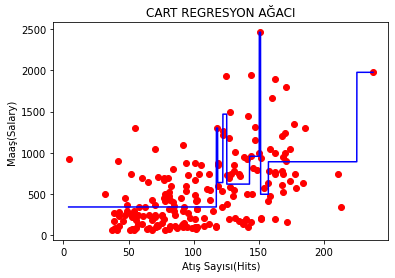

In [ ]:
#Model eksen görselleştirmesi
x_grid = np.arange(min(np.array(x_train)), max(np.array(x_train)), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(x_train, y_train, color = "red")

plt.plot(x_grid, cart_model.predict(x_grid), color = "blue")

plt.title("CART REGRESYON AĞACI")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)");

In [ ]:
#Tek değişkenli tahmin
y_pred = cart_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

486.34593105235456

In [ ]:
#Tüm değişkenler
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) #Kategorik değişkenlere one hot encoding yaklaşımı yaptık.
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64") #Label ve dummi sonrası değişkenlerin kendisini atıyoruz.
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
cart_model = DecisionTreeRegressor().fit(x_train, y_train)
cart_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = cart_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

528.382024797113

#### 2.4.2 Model Doğrulama

In [ ]:
cart_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
cart_model = DecisionTreeRegressor(max_depth = 3).fit(x_train, y_train)
y_pred = cart_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

391.5530522634766

In [ ]:
cart_params = {"max_depth": [1, 2, 3, 0.001, 0.0001, 10, 20], #alpha: ceza parametreleri
              "min_samples_split": [2, 10, 5, 30, 50, 10]}

In [ ]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10, verbose = 2, n_jobs = -1).fit(x_train, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    2.1s finished


In [ ]:
cart_cv_model.best_params_

{'max_depth': 10, 'min_samples_split': 50}

In [ ]:
#Final Modeli
cart_tuned = DecisionTreeRegressor(max_depth = 10, min_samples_split = 50).fit(x_train, y_train)
y_pred = cart_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

361.0876906511434

### 2.5 Random Forests
- Birden fazla algoritmanın ya da birden fazla ağacın bir araya gelerek toplu bir şekilde öğrenmesi ve tahmin etmeye çalışmasıdır.
- Temeli boostrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
- Karar ağacının her bir düğümünde en iyi dallara ayırıcı(bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.

#### 2.5.1 Model Oluşturma ve Tahmin

In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) #Kategorik değişkenlere one hot encoding yaklaşımı yaptık.
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64") #Label ve dummi sonrası değişkenlerin kendisini atıyoruz.
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
rf_model = RandomForestRegressor().fit(x_train, y_train)
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

351.48291341915154

#### 2.5.2 Model Doğrulama

In [ ]:
rf_params = {"max_depth": [5, 8, 10],
             "max_features": [2, 5, 10], #Bölünmelerde göz önünde bulundurulması gereken değişken sayısı
             "n_estimators": [200, 500, 1000, 2000],
             "min_samples_split": [2, 10, 80, 100]}

In [ ]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 26.0min finished


In [ ]:
rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
#Final Modeli
rf_tuned = RandomForestRegressor(max_depth = 5, max_features = 2, min_samples_split = 2, n_estimators = 1000).fit(x_train, y_train)
rf_tuned

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

346.90907265277457

In [ ]:
#DEĞİŞKEN ÖNEM DÜZEYİ

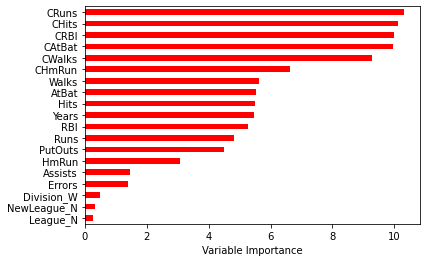

In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index = x_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh",
                                              color = "r")
                       
plt.xlabel("Variable Importance")
plt.gca().legend_ = None                       

### 2.6 Gradient Boosting Machines(GBM)
- AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur.
- Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.
- Boosting Yöntemlerine Giriş: Zayıf öğrenicileri bir araya getirip güçlü bir öğrenici ortaya çıkarmak fikrine dayanır.
- GBM tek bir tahminsel model formunda olan modeller serisi oluşturur.
- Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının üzerine fit edilir.
- GBM = Boosting + Gradient Descent

#### 2.6.1 Model Oluşturma ve Tahmin

In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) #Kategorik değişkenlere one hot encoding yaklaşımı yaptık.
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64") #Label ve dummi sonrası değişkenlerin kendisini atıyoruz.
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
gbm_model = GradientBoostingRegressor().fit(x_train, y_train)
gbm_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = gbm_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

351.81928586257743

#### 2.6.2 Model Doğrulama

In [ ]:
gbm_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gbm_params = {"learning_rate": [0.001, 0.1, 0.01],
             "max_depth": [3, 5, 8], #Bölünmelerde göz önünde bulundurulması gereken değişken sayısı
             "n_estimators": [100, 200, 500],
             "subsample": [1, 0.5, 0.8],
              "loss": ["ls", "lad", "quantile"]}

In [ ]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 18.1min finished


In [ ]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'loss': 'lad',
 'max_depth': 5,
 'n_estimators': 500,
 'subsample': 0.5}

In [ ]:
#Final Modeli
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,
                                      loss = "lad",
                                      max_depth = 5,
                                      n_estimators = 500,
                                      subsample = 0.5).fit(x_train, y_train)

In [ ]:
y_pred = gbm_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

319.80328688199404

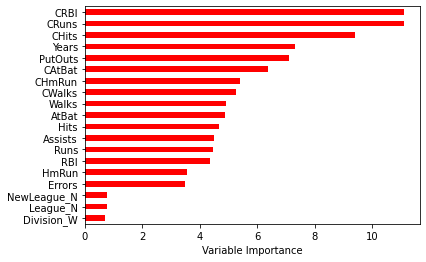

In [ ]:
#DEĞİŞKEN ÖNEM DÜZEYİ
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                          index = x_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh",
                                              color = "r")
                       
plt.xlabel("Variable Importance")
plt.gca().legend_ = None                       

### 2.7 XGBOOST
- GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.

#### 2.7.1 Model Oluşturma ve Tahmin

In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) #Kategorik değişkenlere one hot encoding yaklaşımı yaptık.
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64") #Label ve dummi sonrası değişkenlerin kendisini atıyoruz.
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
xgb_model = XGBRegressor().fit(x_train, y_train)
xgb_model

[17:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

359.91750599447033

#### 2.7.2 Model Doğrulama

In [ ]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_params = {"learning_rate": [0.01, 0.1, 0.5],
             "max_depth": [2, 3, 4, 5, 8], #Bölünmelerde göz önünde bulundurulması gereken değişken sayısı
             "n_estimators": [100, 200, 500, 1000],
             "colsample_bytree": [0.4, 0.7, 1, 1.3, 1.7, 2]}

In [ ]:
xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 702 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 1294 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1774 tasks      | elapsed:  3.0min


[17:55:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  3.2min finished


In [ ]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [ ]:
#Final Modeli
xgb_tuned = XGBRegressor(learning_rate = 0.1,
                         colsample_bytree = 0.4,
                         max_depth = 2,
                         n_estimators = 1000).fit(x_train, y_train)

[18:19:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = xgb_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

343.5566804929871

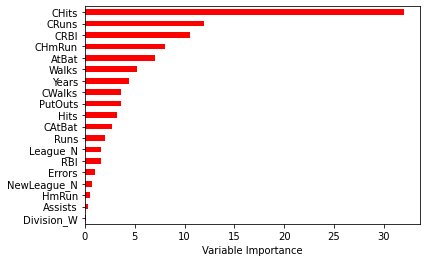

In [ ]:
#DEĞİŞKEN ÖNEM DÜZEYİ
Importance = pd.DataFrame({"Importance": xgb_tuned.feature_importances_*100},
                          index = x_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh",
                                              color = "r")
                       
plt.xlabel("Variable Importance")
plt.gca().legend_ = None                       

### 2.8 Light GBM
- XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.

#### 2.8.1 Model Oluşturma ve Tahmin

In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) #Kategorik değişkenlere one hot encoding yaklaşımı yaptık.
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64") #Label ve dummi sonrası değişkenlerin kendisini atıyoruz.
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
lgbm_model = LGBMRegressor().fit(x_train, y_train)
lgbm_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred = lgbm_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

363.8712087611089

#### 2.8.2 Model Doğrulama

In [ ]:
lgbm_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgbm_params = {"learning_rate": [0.01, 0.1, 0.5, 1],
             "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], #Bölünmelerde göz önünde bulundurulması gereken değişken sayısı
             "n_estimators": [20, 40, 100, 200, 500, 1000]}

In [ ]:
lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 638 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  2.1min finished


In [ ]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [ ]:
#Final Modeli
lgbm_tuned = LGBMRegressor(learning_rate = 0.1,             
                         max_depth = 6,
                         n_estimators = 20).fit(x_train, y_train)

In [ ]:
y_pred = lgbm_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

371.5044868943621

### 2.9 Categort Boost(CatBoost)
- Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı ve başarılır bir diğer GBM türevidir.
- Hızlı ve ölçeklenebilir GPU desteği sağlamaktadır.
- Daha başarılı tahminler yapar.

#### 2.9.1 Model Oluşturma ve Tahmin

In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) #Kategorik değişkenlere one hot encoding yaklaşımı yaptık.
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64") #Label ve dummi sonrası değişkenlerin kendisini atıyoruz.
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
catb_model = CatBoostRegressor().fit(x_train, y_train)
catb_model

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 2.92ms	remaining: 2.91s
1:	learn: 432.4168868	total: 5.43ms	remaining: 2.71s
2:	learn: 426.3836690	total: 7.89ms	remaining: 2.62s
3:	learn: 420.2261014	total: 10.2ms	remaining: 2.54s
4:	learn: 414.9976675	total: 12.6ms	remaining: 2.5s
5:	learn: 409.6125323	total: 14.9ms	remaining: 2.48s
6:	learn: 403.9277911	total: 17.4ms	remaining: 2.47s
7:	learn: 398.4395285	total: 19.7ms	remaining: 2.45s
8:	learn: 392.4517081	total: 22ms	remaining: 2.42s
9:	learn: 387.4871123	total: 24.3ms	remaining: 2.41s
10:	learn: 382.6230510	total: 26.9ms	remaining: 2.42s
11:	learn: 378.1012454	total: 29.7ms	remaining: 2.44s
12:	learn: 372.6002306	total: 32.1ms	remaining: 2.43s
13:	learn: 368.4682192	total: 34.3ms	remaining: 2.42s
14:	learn: 364.0565766	total: 36.5ms	remaining: 2.4s
15:	learn: 359.5683249	total: 38.8ms	remaining: 2.38s
16:	learn: 355.1782794	total: 41ms	remaining: 2.37s
17:	learn: 350.4689946	total: 43.3ms	remaining: 2.36s
18:	learn: 346

In [ ]:
y_pred = catb_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

350.2683163098795

#### 2.9.2 Model Doğrulama

In [ ]:
catb_model

In [ ]:
catb_params = {"iterations": [200, 500, 1000],
              "learning_rate": [0.01, 0.1],
              "depth": [3, 6, 8]}

In [ ]:
catb_cv_model = GridSearchCV(catb_model, catb_params, cv = 5, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.7s


0:	learn: 425.7900818	total: 790us	remaining: 157ms
1:	learn: 404.8723520	total: 1.75ms	remaining: 173ms
2:	learn: 387.4057666	total: 2.56ms	remaining: 168ms
3:	learn: 372.2801584	total: 3.35ms	remaining: 164ms
4:	learn: 358.9204229	total: 4.13ms	remaining: 161ms
5:	learn: 347.0083933	total: 4.86ms	remaining: 157ms
6:	learn: 336.0130818	total: 5.58ms	remaining: 154ms
7:	learn: 324.3923300	total: 6.35ms	remaining: 153ms
8:	learn: 314.8690957	total: 7.05ms	remaining: 150ms
9:	learn: 308.5075563	total: 7.73ms	remaining: 147ms
10:	learn: 298.8587285	total: 8.42ms	remaining: 145ms
11:	learn: 294.7655438	total: 9.17ms	remaining: 144ms
12:	learn: 288.0697862	total: 9.93ms	remaining: 143ms
13:	learn: 282.6697154	total: 10.6ms	remaining: 141ms
14:	learn: 277.6121667	total: 11.4ms	remaining: 140ms
15:	learn: 273.4383979	total: 12ms	remaining: 138ms
16:	learn: 269.1556201	total: 12.8ms	remaining: 137ms
17:	learn: 264.8098704	total: 13.5ms	remaining: 136ms
18:	learn: 261.6700768	total: 14.2ms	rema

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.4min finished


In [ ]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [ ]:
#Final Modeli
catb_tuned = CatBoostRegressor(iterations = 200,             
                         depth = 3,
                         learning_rate = 0.1).fit(x_train, y_train)

0:	learn: 425.7900818	total: 3.44ms	remaining: 684ms
1:	learn: 404.8723520	total: 4.43ms	remaining: 439ms
2:	learn: 387.4057666	total: 5.26ms	remaining: 345ms
3:	learn: 372.2801584	total: 6.08ms	remaining: 298ms
4:	learn: 358.9204229	total: 6.83ms	remaining: 266ms
5:	learn: 347.0083933	total: 7.55ms	remaining: 244ms
6:	learn: 336.0130818	total: 8.33ms	remaining: 230ms
7:	learn: 324.3923300	total: 9.02ms	remaining: 217ms
8:	learn: 314.8690957	total: 9.82ms	remaining: 208ms
9:	learn: 308.5075563	total: 10.5ms	remaining: 200ms
10:	learn: 298.8587285	total: 11.3ms	remaining: 194ms
11:	learn: 294.7655438	total: 12ms	remaining: 189ms
12:	learn: 288.0697862	total: 12.8ms	remaining: 184ms
13:	learn: 282.6697154	total: 13.5ms	remaining: 179ms
14:	learn: 277.6121667	total: 14.2ms	remaining: 175ms
15:	learn: 273.4383979	total: 14.9ms	remaining: 172ms
16:	learn: 269.1556201	total: 15.6ms	remaining: 168ms
17:	learn: 264.8098704	total: 16.4ms	remaining: 165ms
18:	learn: 261.6700768	total: 17.2ms	rem

In [ ]:
y_pred = catb_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

344.3125832615482

## *MAKİNE ÖĞRENMESİNİN OTOMATİKLEŞTİRİLMESİ* 

In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) #Kategorik değişkenlere one hot encoding yaklaşımı yaptık.

In [ ]:
def compML(df, y, alg):
  
  #train-test ayrımı
  y = df[y]
  x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64") #Label ve dummi sonrası değişkenlerin kendisini atıyoruz.
  x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

  #modelleme
  model = alg().fit(x_train, y_train)
  y_pred = model.predict(x_test)
  RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
  model_ismi = alg.__name__
  print(model_ismi, "Modeli Test Hatası:", RMSE)

In [ ]:
models = [LGBMRegressor,
          XGBRegressor,
          GradientBoostingRegressor,
          RandomForestRegressor,
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor,
          SVR]

In [ ]:
#Fonksiyon kullanımı
for i in models:
  compML(df, "Salary", i)

LGBMRegressor Modeli Test Hatası: 363.8712087611089
[21:15:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor Modeli Test Hatası: 359.91750599447033
GradientBoostingRegressor Modeli Test Hatası: 353.27389091428614
RandomForestRegressor Modeli Test Hatası: 340.18516713650945
DecisionTreeRegressor Modeli Test Hatası: 483.7700145024775
MLPRegressor Modeli Test Hatası: 452.6146389698573
KNeighborsRegressor Modeli Test Hatası: 426.6570764525201
SVR Modeli Test Hatası: 460.0032657244849


## 3.SINIFLANDIRMA
- Veri setinde bulunan bağımlı değişkenin sınıflardan oluştuğu durumlarda kullanılan modelleme türüdür.

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
import xgboost 
import lightgbm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

     |████████████████████████████████| 64.8MB 70kB/s 


In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 3.1 Lojistik Regresyon
- Amaç: Sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır.
- Bağımlı değişken kategoriktir.
 

#### 3.1.1 Model Oluşturma ve Tahmin

In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
y = df["Outcome"]
x = df.drop(["Outcome"], axis = 1)

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
loj_model = LogisticRegression(solver = "liblinear").fit(x,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
loj_model.intercept_

array([-5.88653539])

In [ ]:
loj_model.coef_

array([[ 1.17098692e-01,  2.83673379e-02, -1.69010912e-02,
         7.40100722e-04, -6.42594633e-04,  5.96676293e-02,
         6.83738130e-01,  7.20115615e-03]])

In [ ]:
y_pred = loj_model.predict(x)

In [ ]:
loj_model.predict_proba(x)[0:10]

array([[0.35045457, 0.64954543],
       [0.91696714, 0.08303286],
       [0.22444087, 0.77555913],
       [0.92140042, 0.07859958],
       [0.16584029, 0.83415971],
       [0.79901575, 0.20098425],
       [0.88016705, 0.11983295],
       [0.27819813, 0.72180187],
       [0.3215012 , 0.6784988 ],
       [0.92264531, 0.07735469]])

In [ ]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [120, 148]])

In [ ]:
accuracy_score(y, y_pred)

0.7760416666666666

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



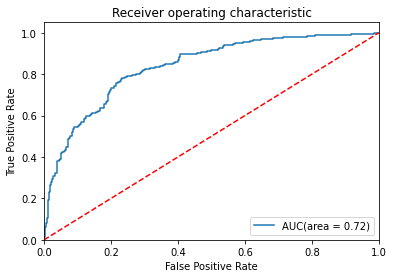

In [ ]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(x))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(x)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label = "AUC(area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc = "lower right")
plt.savefig("Log_ROC")
plt.show()

#### 3.1.2 Model Doğrulama

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
loj_model = LogisticRegression(solver = "liblinear").fit(x_train ,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = loj_model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
print(accuracy_score(y_test, y_pred))

0.7447916666666666


In [ ]:
cross_val_score(loj_model, x_train, y_train, cv = 10).mean()

0.772474289171204

### 3.2 K En Yakın Komşu
- Gözlemlerin birbirine olan benzerlikleri üzerinden tahmin yapılır.

#### 3.2.1 Model Oluşturma ve Tahmin

In [ ]:
y = df["Outcome"]
x = df.drop(["Outcome"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [ ]:
knn_model = KNeighborsClassifier().fit(x_train ,y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.6883116883116883

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



#### 3.2.2 Model Doğrulama

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_params = {"n_neighbors": np.arange(1, 50)}

In [ ]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(x_train, y_train)

In [ ]:
knn_cv_model.best_score_

0.748637316561845

In [ ]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [ ]:
#Final Modeli
knn_tuned = KNeighborsClassifier(n_neighbors = 11).fit(x_train, y_train)
y_pred = knn_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.7316017316017316

In [ ]:
knn_tuned.score(x_test, y_test)

0.7316017316017316

### 3.3 Destek Vektör Makineleri
- Amaç: İki sınıf arasındaki ayrımın optimum olmasını sağlayacak hiper-düzlem bulmaktır.


#### 3.3.1 Model Oluşturma ve Tahmin

In [ ]:
y = df["Outcome"]
x = df.drop(["Outcome"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [ ]:
svc_model = SVC(kernel = "linear").fit(x_train ,y_train)
svc_model #kernel='rbf'--> Doğrusal değil

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



#### 3.3.2 Model Doğrulama

In [ ]:
svc = SVC()

In [ ]:
svc_params = {"C": np.arange(1, 10), 
              "kernel": ["linear", "rbf"]}

In [ ]:
svc_cv_model = GridSearchCV(svc, svc_params, cv = 5, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  7.1min finished


In [ ]:
svc_cv_model.best_score_

0.7839044652128765

In [ ]:
svc_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [ ]:
#Final Modeli
svc_tuned = SVC(C = 2, kernel = "linear").fit(x_train, y_train)
y_pred = svc_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

### 3.4 Yapay Sinir Ağları
- İnsan beyninin çalışma prensibini model alan bir algoritmadır.
-Amaç: En küçük hata ile tahmin yapabilecek katsayılara erişmektir.

#### 3.4.1 Model Oluşturma ve Tahmin

In [ ]:
y = df["Outcome"]
x = df.drop(["Outcome"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [ ]:
scaler = StandardScaler()

In [ ]:
#Ölçeklendirme işlemi yapıyoruz.
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [ ]:
mlp_model = MLPClassifier(solver = "adam").fit(x_train_scaled, y_train)
mlp_model

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp_model.predict(x_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred)

0.7489177489177489

#### 3.4.2 Model Doğrulama

In [ ]:
mlp_params = {"alpha": [1, 2, 3, 4, 5, 0.1, 0.01, 0.03, 0.005, 0.0001], #alpha: ceza parametreleri
              "hidden_layer_sizes": [(10, 10), (3, 5), (100, 100), (100, 100, 100)]} 

In [ ]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(x_train_scaled, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mlp_cv_model.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (10, 10)}

In [ ]:
#Final Modeli
mlp_tuned = MLPClassifier(alpha = 0.0001, hidden_layer_sizes = (10, 10), solver = "adam", activation = "logistic").fit(x_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
y_pred = mlp_tuned.predict(x_test_scaled)
accuracy_score(y_test, y_pred)

0.7489177489177489

### 3.5 CART
- Amaç: Veri setindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.
- Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

#### 3.5.1 Model Oluşturma ve Tahmin

In [ ]:
y = df["Outcome"]
x = df.drop(["Outcome"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [ ]:
cart_model = DecisionTreeClassifier().fit(x_train, y_train)
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Tek değişkenli tahmin
y_pred = cart_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7056277056277056

#### 3.5.2 Model Doğrulama

In [ ]:
cart_params = {"max_depth": [1, 2, 5, 0.001, 0.0001, 10, 20], #alpha: ceza parametreleri
              "min_samples_split": [2, 20, 5, 30, 50, 10]}

In [ ]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10, verbose = 2, n_jobs = -1).fit(x_train, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    1.8s finished


In [ ]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [ ]:
#Final Modeli
cart_tuned = DecisionTreeClassifier(max_depth = 5, min_samples_split = 20).fit(x_train, y_train)
y_pred = cart_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

### 3.6 Random Forest
- Temeli birden çok karar ağacın ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
- Bagging: Temeli boostrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
- Karar ağacının her bir düğümünde en iyi dallara ayırıcı(bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.

#### 3.6.1 Model Oluşturma ve Tahmin

In [ ]:
y = df["Outcome"]
x = df.drop(["Outcome"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [ ]:
rf_model = RandomForestClassifier().fit(x_train, y_train)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

#### 3.6.2 Model Doğrulama

In [ ]:
rf_params = {"max_depth": [5, 8, 10],
             "max_features": [2, 5, 8, 10], #Bölünmelerde göz önünde bulundurulması gereken değişken sayısı
             "n_estimators": [200, 500, 1000, 2000],
             "min_samples_split": [2, 5, 10, 80, 100]}

In [ ]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 45.7min finished


In [ ]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
#Final Modeli
rf_tuned = RandomForestClassifier(max_depth = 5, max_features = 2, min_samples_split = 2, n_estimators = 1000).fit(x_train, y_train)
rf_tuned

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf_tuned.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.48349377841522817

In [ ]:
#DEĞİŞKEN ÖNEM DÜZEYİ

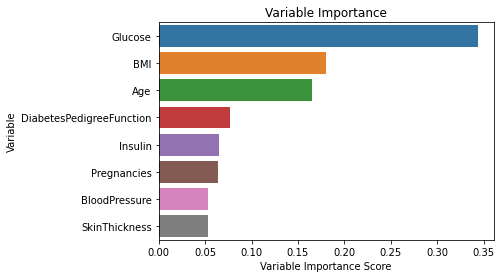

In [ ]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index = x_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_imp, y = feature_imp.index)                      
plt.xlabel("Variable Importance Score")
plt.ylabel("Variable")
plt.title("Variable Importance")
plt.show()                    

### 3.7 Gradient Boosting Machines(GBM)
- AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur.
- Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.
- Boosting Yöntemlerine Giriş: Zayıf öğrenicileri bir araya getirip güçlü bir öğrenici ortaya çıkarmak fikrine dayanır.
- GBM tek bir tahminsel model formunda olan modeller serisi oluşturur.
- Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının üzerine fit edilir.
- GBM = Boosting + Gradient Descent

#### 3.7.1 Model Oluşturma ve Tahmin

In [ ]:
y = df["Outcome"]
x = df.drop(["Outcome"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [ ]:
gbm_model = GradientBoostingClassifier().fit(x_train, y_train)
gbm_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = gbm_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

#### 3.7.2 Model Doğrulama

In [ ]:
gbm_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gbm_params = {"learning_rate": [0.001, 0.1, 0.01],
             "max_depth": [3, 5, 8], #Bölünmelerde göz önünde bulundurulması gereken değişken sayısı
             "n_estimators": [100, 200, 500],
             "subsample": [1, 0.5, 0.8]}

In [ ]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  6.8min finished


In [ ]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

In [ ]:
#Final Modeli
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.01,                                 
                                      max_depth = 5,
                                      n_estimators = 500,
                                      subsample = 0.5).fit(x_train, y_train)

In [ ]:
y_pred = gbm_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

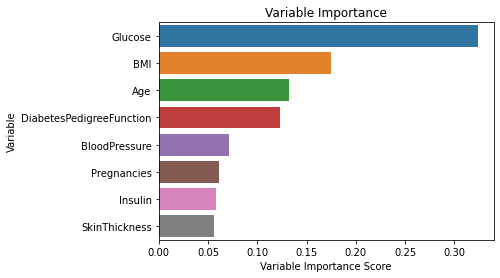

In [ ]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                        index = x_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_imp, y = feature_imp.index)                      
plt.xlabel("Variable Importance Score")
plt.ylabel("Variable")
plt.title("Variable Importance")
plt.show()  

### 3.8 XGBoost
- GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.

#### 3.8.1 Model Oluşturma ve Tahmin

In [ ]:
y = df["Outcome"]
x = df.drop(["Outcome"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [ ]:
xgb_model = XGBClassifier().fit(x_train, y_train)
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

#### 3.8.2 Model Doğrulama

In [ ]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_params = {"learning_rate": [0.01, 0.1, 0.5],
             "max_depth": [2, 3, 4, 5, 8], #Bölünmelerde göz önünde bulundurulması gereken değişken sayısı
             "n_estimators": [100, 200, 500, 1000],
             "colsample_bytree": [0.4, 0.7, 1, 1.3, 1.7, 2]}

In [ ]:
#xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

In [ ]:
#xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [ ]:
#Final Modeli
xgb_tuned = XGBClassifier(learning_rate = 0.001,
                         subsample = 0.6,
                         max_depth = 7,
                         n_estimators = 500).fit(x_train, y_train)

In [ ]:
y_pred = xgb_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

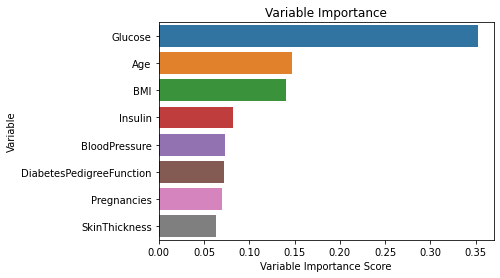

In [ ]:
#DEĞİŞKEN ÖNEM DÜZEYİ
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index = x_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_imp, y = feature_imp.index)                      
plt.xlabel("Variable Importance Score")
plt.ylabel("Variable")
plt.title("Variable Importance")
plt.show()                     

### 3.9 Light GBM
- XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.

#### 3.9.1 Model Oluşturma ve Tahmin

In [ ]:
y = df["Outcome"]
x = df.drop(["Outcome"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [ ]:
lgbm_model = LGBMClassifier().fit(x_train, y_train)
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred = lgbm_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

#### 3.9.2 Model Doğrulama

In [ ]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgbm_params = {"learning_rate": [0.01, 0.1, 0.5],
             "max_depth": [2, 3, 4, 5, 8], #Bölünmelerde göz önünde bulundurulması gereken değişken sayısı
             "n_estimators": [100, 200, 500, 1000]}

In [ ]:
#lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 702 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 1294 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1774 tasks      | elapsed:  3.0min


[17:55:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  3.2min finished


In [ ]:
#xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [ ]:
#Final Modeli
lgbm_tuned = LGBMClassifier(learning_rate = 0.01,                         
                         max_depth = 1,
                         n_estimators = 500).fit(x_train, y_train)

In [ ]:
y_pred = lgbm_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

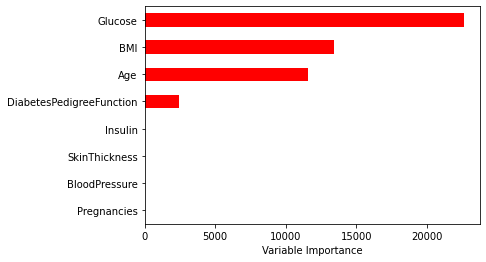

In [ ]:
#DEĞİŞKEN ÖNEM DÜZEYİ
Importance = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_*100},
                          index = x_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh",
                                              color = "r")
                       
plt.xlabel("Variable Importance")
plt.gca().legend_ = None                       

### 3.10 CatBoost
- Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı ve başarılır bir diğer GBM türevidir.
- Hızlı ve ölçeklenebilir GPU desteği sağlamaktadır.
- Daha başarılı tahminler yapar.

#### 3.10.1 Model Oluşturma ve Tahmin

In [ ]:
y = df["Outcome"]
x = df.drop(["Outcome"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [ ]:
catb_model = CatBoostClassifier().fit(x_train, y_train)
catb_model

Learning rate set to 0.0079
0:	learn: 0.6879822	total: 50.9ms	remaining: 50.8s
1:	learn: 0.6843544	total: 53.8ms	remaining: 26.8s
2:	learn: 0.6805937	total: 55.8ms	remaining: 18.5s
3:	learn: 0.6766011	total: 57.6ms	remaining: 14.4s
4:	learn: 0.6721103	total: 59.5ms	remaining: 11.8s
5:	learn: 0.6681927	total: 61.2ms	remaining: 10.1s
6:	learn: 0.6642263	total: 62.7ms	remaining: 8.9s
7:	learn: 0.6603263	total: 64.3ms	remaining: 7.97s
8:	learn: 0.6563030	total: 66.3ms	remaining: 7.29s
9:	learn: 0.6528911	total: 67.9ms	remaining: 6.72s
10:	learn: 0.6488276	total: 69.7ms	remaining: 6.27s
11:	learn: 0.6455457	total: 71.7ms	remaining: 5.91s
12:	learn: 0.6419444	total: 73.6ms	remaining: 5.59s
13:	learn: 0.6374939	total: 75.3ms	remaining: 5.3s
14:	learn: 0.6340194	total: 77.1ms	remaining: 5.06s
15:	learn: 0.6304776	total: 78.8ms	remaining: 4.85s
16:	learn: 0.6267531	total: 80.6ms	remaining: 4.66s
17:	learn: 0.6238199	total: 82.2ms	remaining: 4.49s
18:	learn: 0.6204938	total: 83.9ms	remaining: 4.

In [ ]:
y_pred = catb_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

#### 3.10.2 Model Doğrulama

In [ ]:
catb_model

In [ ]:
catb_params = {"iterations": [200, 500, 1000],
              "learning_rate": [0.01, 0.1],
              "depth": [3, 6, 8]}

In [ ]:
#catb_cv_model = GridSearchCV(catb_model, catb_params, cv = 5, n_jobs = -1, verbose = 2).fit(x_train, y_train)

In [ ]:
#catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [ ]:
#Final Modeli
catb_tuned = CatBoostClassifier(iterations = 200,             
                         depth = 8,
                         learning_rate = 0.03).fit(x_train, y_train)

0:	learn: 0.6730562	total: 5.79ms	remaining: 1.15s
1:	learn: 0.6583303	total: 9.8ms	remaining: 970ms
2:	learn: 0.6413852	total: 13.5ms	remaining: 884ms
3:	learn: 0.6268405	total: 17.3ms	remaining: 849ms
4:	learn: 0.6150883	total: 21.2ms	remaining: 826ms
5:	learn: 0.5989093	total: 25ms	remaining: 808ms
6:	learn: 0.5861303	total: 28.8ms	remaining: 793ms
7:	learn: 0.5735117	total: 32.6ms	remaining: 782ms
8:	learn: 0.5616370	total: 36.5ms	remaining: 776ms
9:	learn: 0.5507706	total: 40.9ms	remaining: 777ms
10:	learn: 0.5388394	total: 44.5ms	remaining: 765ms
11:	learn: 0.5264516	total: 48.5ms	remaining: 759ms
12:	learn: 0.5191660	total: 52.2ms	remaining: 751ms
13:	learn: 0.5104459	total: 55.9ms	remaining: 743ms
14:	learn: 0.5017018	total: 59.6ms	remaining: 735ms
15:	learn: 0.4954928	total: 63.4ms	remaining: 729ms
16:	learn: 0.4896817	total: 67.1ms	remaining: 722ms
17:	learn: 0.4808546	total: 70.9ms	remaining: 717ms
18:	learn: 0.4724010	total: 74.7ms	remaining: 712ms
19:	learn: 0.4657244	tota

In [ ]:
y_pred = catb_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

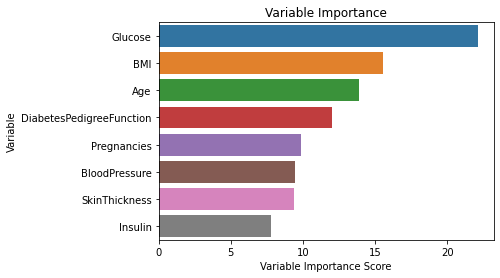

In [ ]:
#DEĞİŞKEN ÖNEM DÜZEYİ
feature_imp = pd.Series(catb_tuned.feature_importances_,
                        index = x_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_imp, y = feature_imp.index)                      
plt.xlabel("Variable Importance Score")
plt.ylabel("Variable")
plt.title("Variable Importance")
plt.show()                    

## *MAKİNE ÖĞRENMESİNİN OTOMATİKLEŞTİRİLMESİ* 

In [ ]:
models = [lgbm_tuned,
          xgb_tuned,
          loj_model,
          gbm_tuned,
          rf_tuned,
          cart_tuned,
          catb_tuned,
          mlp_tuned,
          knn_tuned,
          svc_tuned]

sonuc = []
sonuclar = pd.DataFrame(columns = ["models", "Accuracy"])     

for model in models:
  isimler = model.__class__.__name__
  y_pred = model.predict(x_test)
  dogruluk = accuracy_score(y_test, y_pred)
  sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns = ["models", "Accuracy"])
  sonuclar = sonuclar.append(sonuc)

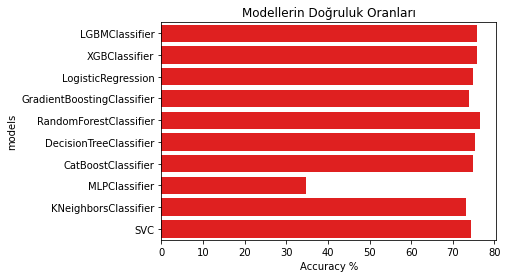

In [ ]:
sns.barplot(x = "Accuracy", y = "models", data = sonuclar, color = "r")                      
plt.xlabel("Accuracy %")
plt.title("Modellerin Doğruluk Oranları");

In [ ]:
sonuclar

,models,Accuracy
0,LGBMClassifier,75.757576
0,XGBClassifier,75.757576
0,LogisticRegression,74.891775
0,GradientBoostingClassifier,74.025974
0,RandomForestClassifier,76.623377
0,DecisionTreeClassifier,75.324675
0,CatBoostClassifier,74.891775
0,MLPClassifier,34.632035
0,KNeighborsClassifier,73.160173
0,SVC,74.458874


## 4.DENETİMSİZ ÖĞRENME
- Elimizdeki veri setinde bağımlı değişken olmadığında yani bağımsız değişkenler belirli bir çıktı ile ilişkilendirilemediğinde oluşan veri setlerinin üzerinde yapılan öğrenme işlemidir.

### 4.1 K-Means
- Amaç: Gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır.

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [ ]:
df = pd.read_csv("/content/USArrests.csv", index_col = 0)

In [ ]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


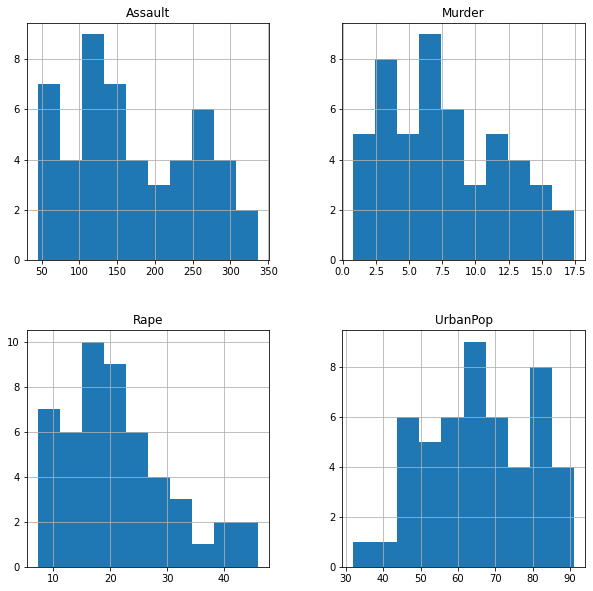

In [ ]:
df.hist(figsize = (10, 10));

In [ ]:
kmeans = KMeans(n_clusters = 2).fit(df)

In [ ]:
kmeans.n_clusters

2

In [ ]:
kmeans.cluster_centers_

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

In [ ]:
kumeler = kmeans.labels_

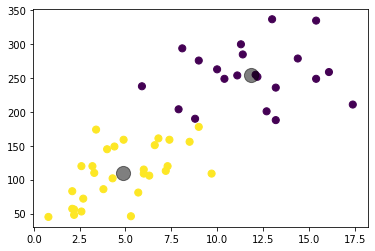

In [ ]:
# Kümelerin Görselleştirilmesi
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis");
merkezler = kmeans.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

#### Optimum Küme Sayısının Belirlenmesi

##### Elbow Yöntemi

In [ ]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [ ]:
ssd = []
k = range(1, 30)

for i in k:
  kmeans= KMeans(n_clusters = i).fit(df)
  ssd.append(kmeans.inertia_)

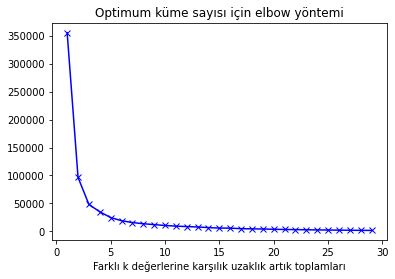

In [ ]:
plt.plot(k, ssd, "bx-");
plt.xlabel("Farklı k değerlerine karşılık uzaklık artık toplamları");
plt.title("Optimum küme sayısı için elbow yöntemi");

In [ ]:
#alternatif
!pip install yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

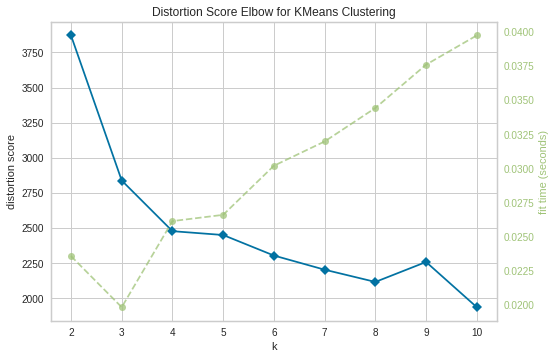

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, i = (2, 20))
visu.fit(df)
visu.poof()

In [ ]:
#Final Modeli
kmeans = KMeans(n_clusters = 4).fit(df)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kumeler = kmeans.labels_

In [ ]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [ ]:
df["Kume_No"] = kumeler
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,2


### 4.2 Hiyerarşik Kümeleme
- Amaç: Gözlemleri birbirlerine olan benzerliklerine göre alt kümelere ayırmaktır.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")

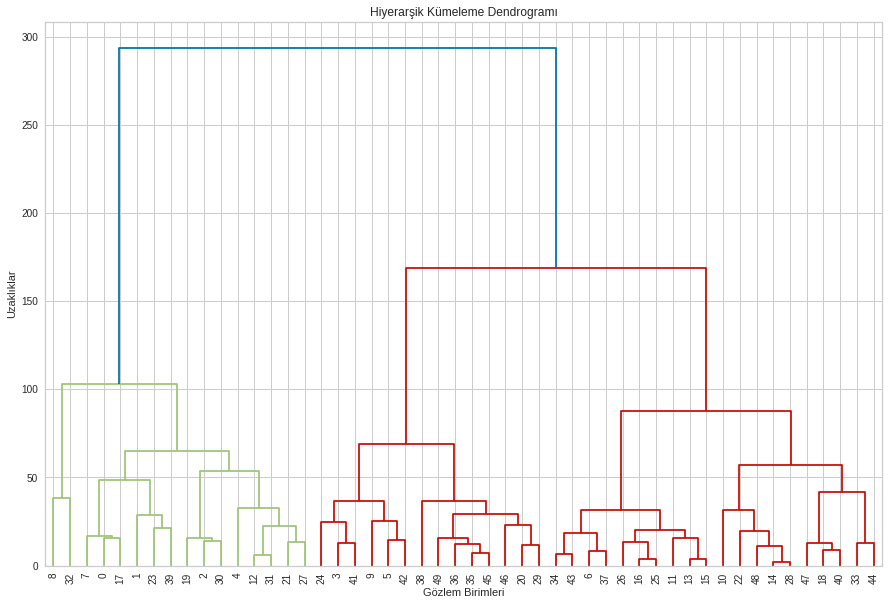

In [ ]:
plt.figure(figsize = (15, 10))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           leaf_font_size = 10);

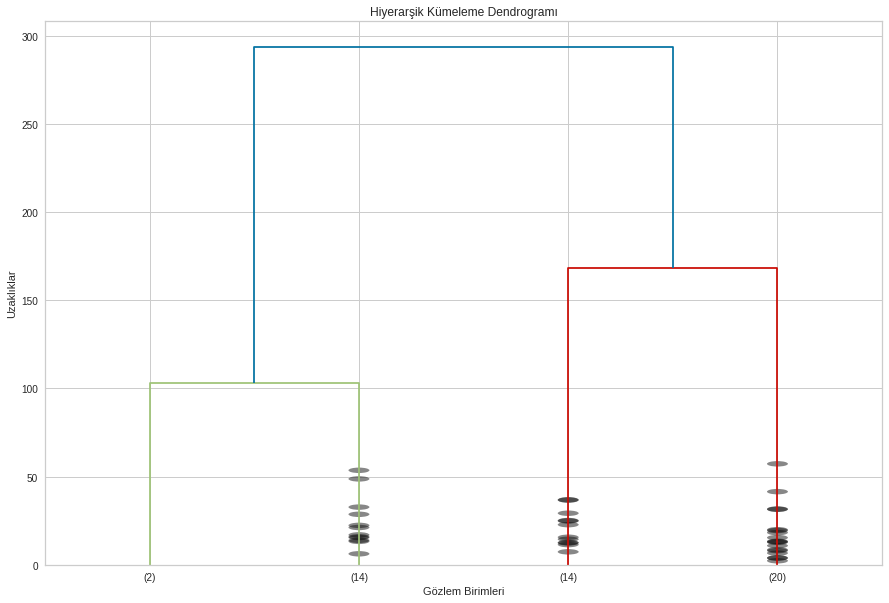

In [ ]:
plt.figure(figsize = (15, 10))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           truncate_mode = "lastp",
           p = 4,
           show_contracted = True,
           leaf_font_size = 10);

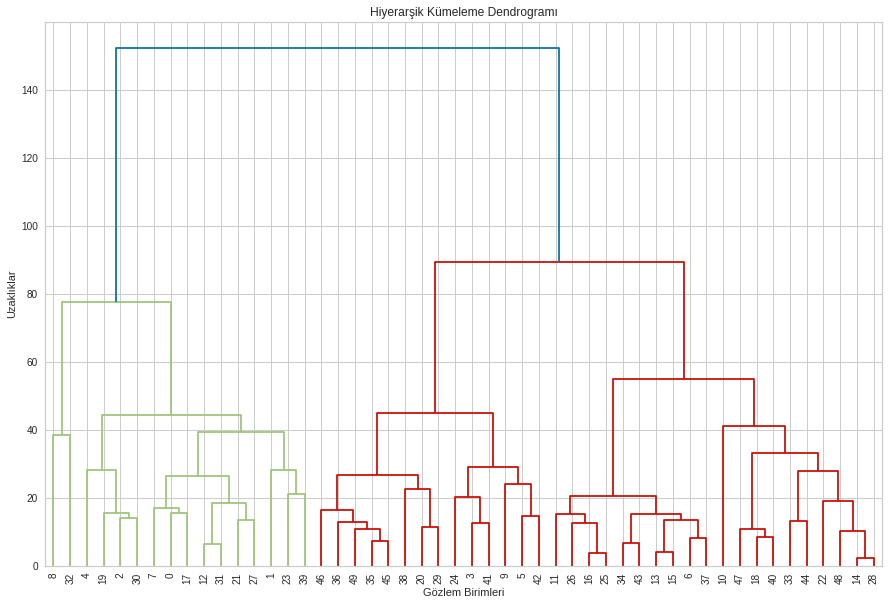

In [ ]:
plt.figure(figsize = (15, 10))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size = 10);

### 4.3 Temel Bileşen 
- Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken/bileşen ile temsil etmektedir.

In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
df = df._get_numeric_data() #Sadece sayısal değişkenleri seçmemize yarıyor.
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df = StandardScaler().fit_transform(df)

In [ ]:
df[0:5, 0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2).fit_transform(df)

In [ ]:
bilesen_df = pd.DataFrame(data = pca, columns = ["birinci_bilesen", "ikinci_bilesen"])
bilesen_df

,birinci_bilesen,ikinci_bilesen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [ ]:
explained_variance = np.var(pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

In [ ]:
np.cumsum(explained_variance_ratio)

array([0.65108634, 1.        ])

Text(0, 0.5, 'Kümülatif Varyans Oranı')

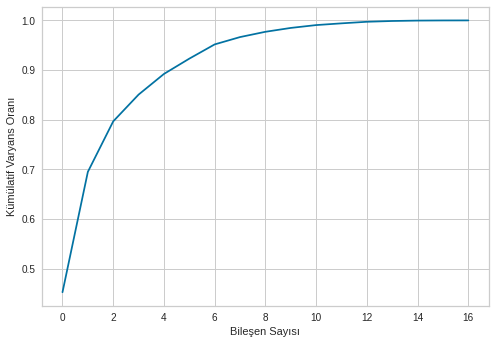

In [ ]:
#Optimum bileşen sayısı
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı")